# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`This is how we write code`

## Let's make some data to work on

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


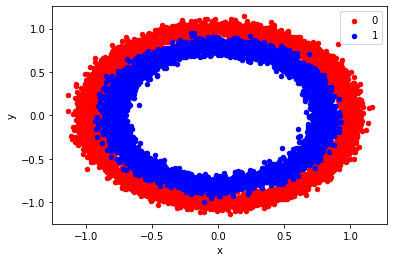

In [2]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
n = 10000
X, y = make_circles(n_samples=n, noise=0.05)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
datadict = {'X1': X[:,0],'X2' : X[:,1], 'target': y}
data = pd.DataFrame(data=datadict)


In [3]:
X = data.iloc[:,[0, 1]].values
type(X)

numpy.ndarray

In [0]:
y = data.target.values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler 
scaleObj = StandardScaler()
X_train = scaleObj.fit_transform(X_train)
X_test = scaleObj.transform(X_test)


In [8]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(D,))
dense_layer_1 = Dense(20, activation='relu')(input_layer)
dense_layer_2 = Dense(20, activation='relu')(input_layer)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.5136 - val_loss: 0.6788 - val_accuracy: 0.5445
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5391 - val_loss: 0.6651 - val_accuracy: 0.5715
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.6488 - val_loss: 0.6478 - val_accuracy: 0.6310
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.7828 - val_loss: 0.6248 - val_accuracy: 0.7325
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.8597 - val_loss: 0.5926 - val_accuracy: 0.9200
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.9337 - val_loss: 0.5617 - val_accuracy: 0.9145
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.9461 - val_loss: 0.5270 - val_accuracy: 0.9635
Epoch 

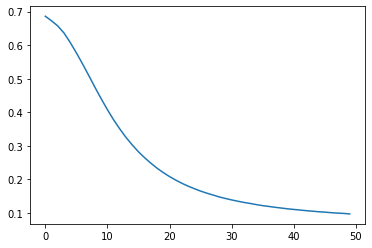

In [9]:
plt.plot(report.history['loss'], label="loss = SGD")

In [10]:
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [0]:
y_predicted = model.predict(X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


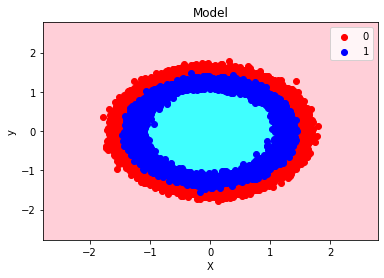

In [17]:
# Visualising the results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

No handles with labels found to put in legend.


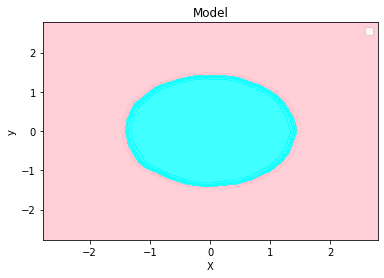

In [18]:
# Visualising the results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [19]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))

250/250 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9736
Train eval:  [0.09693623334169388, 0.9736250042915344]
63/63 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9725
Test eval:  [0.09803852438926697, 0.9725000262260437]
